In [1]:
import pandas as pd
import numpy as np
#import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

def dia():
    from datetime import date, timedelta
    dia = date.today() + timedelta(0)
    return dia

def drop_reset_index(df):
    df = df.dropna()
    df = df.reset_index(drop=True)
    df.index += 1
    return df
    
def grafico(df, nome):
    df = df.reset_index(drop=True)
    df.index += 1
    df['Profit_acu'] = df.Profit.cumsum()
    profit = round(df.Profit_acu.tail(1).item(),2)
    ROI = round((df.Profit_acu.tail(1)/len(df)*100).item(),2)
    df.Profit_acu.plot(title=nome, xlabel='Entradas', ylabel='Stakes')
    print("Profit:",profit,"stakes em", len(df),"jogos")
    print("ROI:",ROI,"%")

# Importando a Base de Dados

In [2]:
# df1 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/ENGLAND%20-%20CHAMPIONSHIP.csv?raw=true")
# df2 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/ENGLAND%20-%20PREMIER%20LEAGUE.csv?raw=true")
# df3 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/FRANCE%20-%20LIGUE%201.csv?raw=true")
# df4 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/FRANCE%20-%20LIGUE%202.csv?raw=true")
# df5 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/GERMANY%20-%202.%20BUNDESLIGA.csv?raw=true")
# df6 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/GERMANY%20-%20BUNDESLIGA.csv?raw=true")
# df7 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/ITALY%20-%20SERIE%20A.csv?raw=true")
# df8 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/ITALY%20-%20SERIE%20B.csv?raw=true")
# df9 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/SPAIN%20-%20LALIGA.csv?raw=true")
# df10 = pd.read_csv("https://github.com/futpythontrader/YouTube/blob/main/Base_de_Dados/FlashScore/SPAIN%20-%20LALIGA2.csv?raw=true")
# df1 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")#inglaterra 1
# df2 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/E0.csv")#inglaterra 1
# df3 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/E1.csv") #inglaterra 2
# df4 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E1.csv") #inglaterra 2
# df5 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/D1.csv")#alemanha1
# df6 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/D1.csv")#alemanha1
# df7 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/D2.csv")#alemanha2
# df8 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/D2.csv")#alemanha2
# df9 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/I1.csv") #italia A
# df10 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/I1.csv") #italia A
# df11 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/I2.csv") #italia B
# df12 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/I2.csv") #italia B
# df13 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/SP1.csv") #spain 1
# df14 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/SP1.csv") #spain 1
# df15 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/SP2.csv") #spain 2
# df16 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/SP2.csv") #spain 2
# df17 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/F1.csv") #franca 1
# df18 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/F1.csv") #franca 1
# df19 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/F2.csv") #franca 2
# df20 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/F2.csv") #franca 2
# df21 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/N1.csv") #holanda 1
# df22 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/N1.csv") #holanda 1

df1 = pd.read_excel("G:\\Meu Drive\\Programacao\\futPythonTrader\\BasesDeDados\\x_FutPythonTrader_Base_de_Dados_Temporada_2122_x.xlsx")
df2 = pd.read_excel("https://github.com/futpythontrader/YouTube/raw/main/x_FutPythonTrader_Base_de_Dados_Temporada_Atual_x.xlsx")


df = pd.concat([df1,df2])
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)

#df = df[['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','B365H','B365D','B365A','B365>2.5', 'B365<2.5']]
df = df[['Date','League','Home','Away','Season','FT_Goals_H','FT_Goals_A','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over25','FT_Odds_Under25','Odds_BTTS_Yes','Odds_BTTS_No']]

#df = df.rename(columns={'Div': 'League', 'Date': 'Date', 'HomeTeam': 'Home', 'AwayTeam': 'Away', 'FTHG': 'FT_Goals_H', 'FTAG': 'FT_Goals_A', 'B365H': 'FT_Odd_H', 'B365D': 'FT_Odd_D', 'B365A': 'FT_Odd_A', 'B365>2.5': 'FT_Odd_Over25', 'B365<2.5': 'FT_Odd_Under25'})

#df = df[['League', 'Date','Time','Home','Away','Season','FT_Goals_H','FT_Goals_A','FT_Odd_H','FT_Odd_D','FT_Odd_A','FT_Odd_Over25','FT_Odd_Under25','FT_Odd_BTTS_Yes','FT_Odd_BTTS_No']]
#gols full time home
#gols full time away
#full time odd home
#full time odd away
#full time odd draw
#full time odd over 2.5
#full time odd under 2.5
#full time btts yes
#full time btts no

#df = drop_reset_index(df)

df

,Date,League,Home,Away,Season,FT_Goals_H,FT_Goals_A,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over25,FT_Odds_Under25,Odds_BTTS_Yes,Odds_BTTS_No
Nº,,,,,,,,,,,,,,
1,2022-02-11 20:00:00,Argentina Prim B Nacional,Deportivo Morón,Tristán Suárez,2022,0,0,2.36,2.74,3.20,2.34,1.53,2.19,1.64
2,2022-02-12 17:00:00,Argentina Prim B Nacional,Almagro,Club Atlético Mitre,2022,2,1,2.08,3.06,3.89,2.38,1.51,2.20,1.62
3,2022-02-12 17:00:00,Argentina Prim B Nacional,Deportivo Madryn,Agropecuario,2022,1,0,3.27,2.98,2.09,2.13,1.64,2.00,1.74
4,2022-02-12 17:00:00,Argentina Prim B Nacional,Flandria,Defensores de Belgrano,2022,1,1,2.57,2.81,3.03,2.99,1.34,2.40,1.52
5,2022-02-12 17:00:00,Argentina Prim B Nacional,Villa Dálmine,Guillermo Brown,2022,1,2,2.59,2.71,3.25,3.21,1.30,2.46,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43760,2023-04-22 08:45:00,Wales Welsh Premier League,Airbus UK,Haverfordwest County,2022/2023,1,4,9.00,6.00,1.25,1.36,2.76,2.10,1.67
43761,2023-04-22 08:45:00,Wales Welsh Premier League,Pontypridd Town AFC,Flint Town United,2022/2023,3,2,2.29,3.36,2.29,1.68,1.84,1.60,2.20
43762,2023-05-05 15:45:00,Wales Welsh Premier League,Bala Town,Newtown,2022/2023,2,4,1.70,3.60,3.90,1.54,2.31,1.62,2.24


In [3]:
flt = ((df.FT_Odds_H != 0) & (df.FT_Odds_D != 0) & (df.FT_Odds_A != 0))
df = df[flt]

#somandos os gols do jogo para chegar no total
df["Total_Goals_FT"] = df["FT_Goals_H"] + df["FT_Goals_A"]

#verificando qual o resultado das partidas
df.loc[df['FT_Goals_H'] > df['FT_Goals_A'], 'FT_Result'] = "H"
df.loc[df['FT_Goals_H'] == df['FT_Goals_A'], 'FT_Result'] = "D"
df.loc[df['FT_Goals_H'] < df['FT_Goals_A'], 'FT_Result'] = "A"

#verificando se foi btts sim ou nao e preenchendo a coluna ft_btts
# df.loc[(df['FT_Goals_H'] > 0) & (df['FT_Goals_A'] > 0), 'BTTS'] = "S"
# df.loc[(df['FT_Goals_H'] > 0) & (df['FT_Goals_A'] < 1), 'BTTS'] = "N"
# df.loc[(df['FT_Goals_H'] < 1) & (df['FT_Goals_A'] > 0), 'BTTS'] = "N"
# df.loc[(df['FT_Goals_H'] < 1) & (df['FT_Goals_A'] < 1), 'BTTS'] = "N"

df['BTTS'] = df.apply(lambda row: 0 if (row['FT_Goals_H'] > 0 and row['FT_Goals_A'] > 0) else 1, axis=1) 

#verificando quais jogos tiveram over 2.5
df['Over25_FT'] = df.apply(lambda row: 1 if (row['Total_Goals_FT'] > 2) else 0, axis=1)

#verificando a porcetagem de 2.5 de 5 em 5 partidas
df['Porc_Over25FT_Home'] = (df.groupby('Home')['Over25_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)
df['Porc_Over25FT_Away'] = (df.groupby('Away')['Over25_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)

#verificando a porcetagem de btts de 5 em 5 partidas
df['Porc_BTTS_Home'] = (df.groupby('Home')['BTTS'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)
df['Porc_BTTS_Away'] = (df.groupby('Away')['BTTS'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)

# Médias, Desvio Padrão e Coeficiente de Variação

df['Media_Gols_Feitos_Home'] = df.groupby('Home')['FT_Goals_H'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)
df['Media_Gols_Sofridos_Home'] = df.groupby('Home')['FT_Goals_A'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)

df['Media_Gols_Feitos_Away'] = df.groupby('Away')['FT_Goals_A'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)
df['Media_Gols_Sofridos_Away'] = df.groupby('Away')['FT_Goals_H'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)

df['DP_Gols_Feitos_Home'] = df.groupby('Home')['FT_Goals_H'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)
df['DP_Gols_Sofridos_Home'] = df.groupby('Home')['FT_Goals_A'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)

df['DP_Gols_Feitos_Away'] = df.groupby('Away')['FT_Goals_A'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)
df['DP_Gols_Sofridos_Away'] = df.groupby('Away')['FT_Goals_H'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)

df['CV_Gols_Feitos_Home'] = (df['DP_Gols_Feitos_Home'] / df['Media_Gols_Feitos_Home']).shift(1)
df['CV_Gols_Sofridos_Home'] = (df['DP_Gols_Sofridos_Home'] / df['Media_Gols_Sofridos_Home']).shift(1)

df['CV_Gols_Feitos_Away'] = (df['DP_Gols_Feitos_Away'] / df['Media_Gols_Feitos_Away']).shift(1)
df['CV_Gols_Sofridos_Away'] = (df['DP_Gols_Sofridos_Away'] / df['Media_Gols_Sofridos_Away']).shift(1)

# Profit

Stake = 1
green = Stake * (df.Odds_BTTS_No - 1) 
red = -Stake

df.loc[df['BTTS'] == 1, 'Profit'] = green
df.loc[df['BTTS'] == 0, 'Profit'] = red

#porcentagem dos gols

# Probabilidades
df['p_H'] = 1 / df.FT_Odds_H
df['p_D'] = 1 / df.FT_Odds_D
df['p_A'] = 1 / df.FT_Odds_A

# CV das Odds do Match Odds
df['CV_HDA'] = df[['p_H','p_D','p_A']].std(ddof=0, axis=1) / df[['p_H','p_D','p_A']].mean(axis=1)


# Valor do Gol
df['VG_H'] = df.FT_Goals_H * df.p_A
df['VG_A'] = df.FT_Goals_A * df.p_H

df['Media_VG_H'] = df.groupby('Home')['VG_H'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)
df['Media_VG_A'] = df.groupby('Away')['VG_A'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)

df['Media_VG_H'] = df.groupby('Home')['Media_VG_H'].shift(1)
df['Media_VG_A'] = df.groupby('Away')['Media_VG_A'].shift(1)

df['DesvPad_VG_H'] = df.groupby('Home')['VG_H'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)
df['DesvPad_VG_A'] = df.groupby('Away')['VG_A'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)

df['DesvPad_VG_H'] = df.groupby('Home')['DesvPad_VG_H'].shift(1)
df['DesvPad_VG_A'] = df.groupby('Away')['DesvPad_VG_A'].shift(1)

df['CV_VG_H'] = df['DesvPad_VG_H'] / df['Media_VG_H']
df['CV_VG_A'] = df['DesvPad_VG_A'] / df['Media_VG_A']

# Custo do Gol
df['CG_H'] = df.p_H / df.FT_Goals_H
df['CG_A'] = df.p_A / df.FT_Goals_A

df['Media_CG_H'] = df.groupby('Home')['CG_H'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)
df['Media_CG_A'] = df.groupby('Away')['CG_A'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)

df['Media_CG_H'] = df.groupby('Home')['Media_CG_H'].shift(1)
df['Media_CG_A'] = df.groupby('Away')['Media_CG_A'].shift(1)

df['DesvPad_CG_H'] = df.groupby('Home')['CG_H'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)
df['DesvPad_CG_A'] = df.groupby('Away')['CG_A'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)

df['DesvPad_CG_H'] = df.groupby('Home')['DesvPad_CG_H'].shift(1)
df['DesvPad_CG_A'] = df.groupby('Away')['DesvPad_CG_A'].shift(1)

df['CV_CG_H'] = df['DesvPad_CG_H'] / df['Media_CG_H']
df['CV_CG_A'] = df['DesvPad_CG_A'] / df['Media_CG_A']

df.replace(np.inf, 1, inplace=True)
df = drop_reset_index(df)

df = df.drop(['VG_H', 'VG_A', 'CG_H', 'CG_A'], axis=1)
df.to_excel(f'teste_btts_nao_.xlsx', index=None)
df

,Date,League,Home,Away,Season,FT_Goals_H,FT_Goals_A,FT_Odds_H,FT_Odds_D,FT_Odds_A,...,DesvPad_VG_H,DesvPad_VG_A,CV_VG_H,CV_VG_A,Media_CG_H,Media_CG_A,DesvPad_CG_H,DesvPad_CG_A,CV_CG_H,CV_CG_A
1,2022-03-11 20:10:00,Argentina Prim B Nacional,Belgrano,San Martín San Juan,2022,2,0,1.95,3.02,4.20,...,0.127080,0.003057,0.352291,0.006772,0.420380,0.279843,0.167855,0.005871,0.399293,0.020979
2,2022-03-11 21:30:00,Argentina Prim B Nacional,Estudiantes Río Cuarto,Defensores de Belgrano,2022,0,2,2.08,2.75,3.25,...,0.013242,0.063179,0.040650,0.139690,0.397013,0.281296,0.019654,0.048737,0.049505,0.173261
3,2022-03-12 17:00:00,Argentina Prim B Nacional,Deportivo Madryn,Brown de Adrogué,2022,1,1,2.12,2.89,3.55,...,0.030901,0.389859,0.069042,0.498531,0.304420,0.211643,0.001390,0.110938,0.004566,0.524175
4,2022-03-12 17:00:00,Argentina Prim B Nacional,Deportivo Riestra,Chaco For Ever,2022,1,1,2.58,2.78,2.83,...,0.090785,0.202043,0.192744,0.346991,0.276070,0.273447,0.071152,0.106781,0.257732,0.390498
5,2022-03-12 21:10:00,Argentina Prim B Nacional,Almirante Brown,Estudiantes Caseros,2022,1,0,2.28,2.88,3.20,...,0.244191,0.042441,0.502722,0.091743,0.338915,0.269010,0.187400,0.025108,0.552941,0.093333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36662,2023-04-22 08:45:00,Wales Welsh Premier League,Airbus UK,Haverfordwest County,2022/2023,1,4,9.00,6.00,1.25,...,0.383432,0.299757,1.292049,0.768981,0.172392,0.306955,0.138076,0.113738,0.800940,0.370538
36663,2023-04-22 08:45:00,Wales Welsh Premier League,Pontypridd Town AFC,Flint Town United,2022/2023,3,2,2.29,3.36,2.29,...,0.519316,0.329855,0.926502,1.268889,0.264509,0.296462,0.150926,0.094280,0.570591,0.318017
36664,2023-05-05 15:45:00,Wales Welsh Premier League,Bala Town,Newtown,2022/2023,2,4,1.70,3.60,3.90,...,0.206986,0.535242,1.079409,0.983668,0.441501,0.216051,0.183247,0.094869,0.415054,0.439105
36665,2023-05-06 13:15:00,Wales Welsh Premier League,Cardiff MU,Haverfordwest County,2022/2023,0,0,1.97,3.55,3.00,...,0.613906,0.299826,1.061932,0.768385,0.222143,0.282617,0.078229,0.115775,0.352157,0.409653


# Filtros do Método

Profit: 158.04 stakes em 858 jogos
ROI: 18.42 %


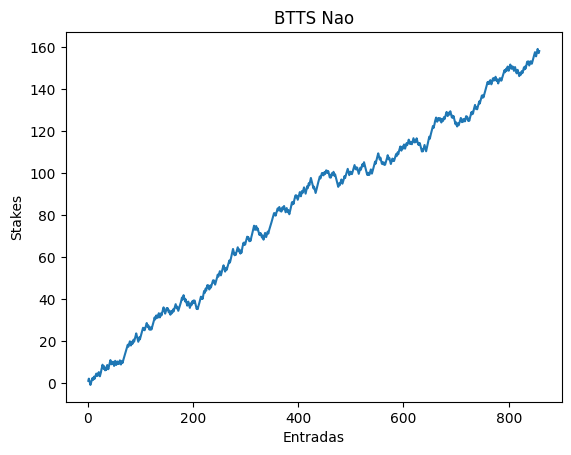

In [4]:
flt = (
((df.CV_CG_A >= 0.2)) & ((df.CV_CG_A <= 0.9))
& ((df.Odds_BTTS_No >= 1.8)) & ((df.Odds_BTTS_No <= 2.4))
& ((df.Porc_BTTS_Home >= 40)) & ((df.Porc_BTTS_Home <= 90))
& ((df.Media_Gols_Sofridos_Away >= 1)) & ((df.Media_Gols_Sofridos_Away <= 1.5))
& ((df.CV_Gols_Sofridos_Away >= 0.9)) & ((df.CV_Gols_Sofridos_Away <= 1.2))
)


df = df[df['League'].isin([
"Argentina Primera División",
"Austria Bundesliga",
"Belgium First Division B",
"Belgium Pro League",
"Bolivia LFPB",
"Brazil Serie A",
"Bulgaria First League",
"Chile Primera B",
"Chile Segunda División",
"Colombia Categoria Primera A",
"Ecuador Primera Categoría Serie A",
"England Championship",
"England EFL League One",
"England EFL League Two",
"England Premier League",
"Estonia Meistriliiga",
"Finland Veikkausliiga",
"France Ligue 1",
"Germany 2. Bundesliga",
"Greece Super League",
"Italy Serie B",
"Mexico Ascenso MX",
"Netherlands Eredivisie",
"Netherlands Tweede Divisie",
"Peru Primera División",
"Poland Ekstraklasa",
"Portugal Liga NOS",
"Slovenia PrvaLiga",
"South America Copa Libertadores",
"South Korea K League 2",
"Spain Segunda División",
"Sweden Allsvenskan",
"Switzerland Challenge League",
"Switzerland Super League",
"Ukraine Ukrainian Premier League",
"Venezuela Primera División",
"Wales Welsh Premier League"
]) == True]
df0 = df[flt]
grafico(df0,'BTTS Nao')

# Unindo a Base de Dados com os Jogos do Dia

In [5]:
df0['League'].unique()

array(['Argentina Primera División', 'Austria Bundesliga',
       'Belgium First Division B', 'Belgium Pro League', 'Bolivia LFPB',
       'Brazil Serie A', 'Bulgaria First League', 'Chile Primera B',
       'Chile Segunda División', 'Colombia Categoria Primera A',
       'Ecuador Primera Categoría Serie A', 'England Championship',
       'England EFL League One', 'England EFL League Two',
       'England Premier League', 'Estonia Meistriliiga',
       'Finland Veikkausliiga', 'France Ligue 1', 'Germany 2. Bundesliga',
       'Greece Super League', 'Italy Serie B', 'Mexico Ascenso MX',
       'Netherlands Eredivisie', 'Netherlands Tweede Divisie',
       'Peru Primera División', 'Poland Ekstraklasa', 'Portugal Liga NOS',
       'Slovenia PrvaLiga', 'South America Copa Libertadores',
       'South Korea K League 2', 'Spain Segunda División',
       'Sweden Allsvenskan', 'Switzerland Challenge League',
       'Switzerland Super League', 'Venezuela Primera División',
       'Wales Welsh P

In [6]:

df1 = pd.read_excel("G:\\Meu Drive\\Programacao\\futPythonTrader\\BasesDeDados\\x_FutPythonTrader_Base_de_Dados_Temporada_2122_x.xlsx")
df2 = pd.read_excel("https://github.com/futpythontrader/YouTube/raw/main/x_FutPythonTrader_Base_de_Dados_Temporada_Atual_x.xlsx")
base = pd.concat([df1,df2])
base.reset_index(inplace=True, drop=True)
base.index = base.index.set_names(['Nº'])
base = base.rename(index=lambda x: x + 1)

base = base[['Date','League','Home','Away','Season','FT_Goals_H','FT_Goals_A','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over25','FT_Odds_Under25','Odds_BTTS_Yes','Odds_BTTS_No']]
base["Date"] = pd.to_datetime(base["Date"])


In [7]:
base['League'].unique()

array(['Argentina Prim B Nacional', 'Argentina Primera División',
       'Australia A-League', 'Austria 2. Liga', 'Austria Bundesliga',
       'Belgium First Division B', 'Belgium Pro League', 'Bolivia LFPB',
       'Brazil Serie A', 'Brazil Serie B', 'Brazil Serie C',
       'Brazil Serie D', 'Bulgaria First League',
       'Canada Canadian Premier League', 'Chile Primera B',
       'Chile Primera División', 'Chile Segunda División',
       'China Chinese Super League', 'Colombia Categoria Primera A',
       'Colombia Categoria Primera B', 'Croatia Prva HNL',
       'Czech Republic First League', 'Denmark 1st Division',
       'Denmark Superliga', 'Ecuador Primera Categoría Serie A',
       'Egypt Egyptian Premier League', 'England Championship',
       'England EFL League One', 'England EFL League Two',
       'England National League', 'England Premier League',
       'Estonia Meistriliiga', 'Europe UEFA Champions League',
       'Finland Veikkausliiga', 'France Ligue 1', 'France Li

In [8]:
base = base[base['League'].isin(["Argentina Primera División",
"Austria Bundesliga",
"Belgium First Division B",
"Belgium Pro League",
"Bolivia LFPB",
"Brazil Serie A",
"Bulgaria First League",
"Chile Primera B",
"Chile Segunda División",
"Colombia Categoria Primera A",
"Ecuador Primera Categoría Serie A",
"England Championship",
"England EFL League One",
"England EFL League Two",
"England Premier League",
"Estonia Meistriliiga",
"Finland Veikkausliiga",
"France Ligue 1",
"Germany 2. Bundesliga",
"Greece Super League",
"Italy Serie B",
"Mexico Ascenso MX",
"Netherlands Eredivisie",
"Netherlands Tweede Divisie",
"Peru Primera División",
"Poland Ekstraklasa",
"Portugal Liga NOS",
"Slovenia PrvaLiga",
"South America Copa Libertadores",
"South Korea K League 2",
"Spain Segunda División",
"Sweden Allsvenskan",
"Switzerland Challenge League",
"Switzerland Super League",
"Ukraine Ukrainian Premier League",
"Venezuela Primera División",
"Wales Welsh Premier League"]) == True]

In [9]:
flt = ((base.FT_Odds_H != 0) & (base.FT_Odds_D != 0) & (base.FT_Odds_A != 0))
base = base[flt]

#somandos os gols do jogo para chegar no total
base["Total_Goals_FT"] = base["FT_Goals_H"] + base["FT_Goals_A"]

#verificando qual o resultado das partidas
base.loc[base['FT_Goals_H'] > base['FT_Goals_A'], 'FT_Result'] = "H"
base.loc[base['FT_Goals_H'] == base['FT_Goals_A'], 'FT_Result'] = "D"
base.loc[base['FT_Goals_H'] < base['FT_Goals_A'], 'FT_Result'] = "A"

#verificando se foi btts sim ou nao e preenchendo a coluna ft_btts
# base.loc[(base['FT_Goals_H'] > 0) & (base['FT_Goals_A'] > 0), 'BTTS'] = "S"
# base.loc[(base['FT_Goals_H'] > 0) & (base['FT_Goals_A'] < 1), 'BTTS'] = "N"
# base.loc[(base['FT_Goals_H'] < 1) & (base['FT_Goals_A'] > 0), 'BTTS'] = "N"
# base.loc[(base['FT_Goals_H'] < 1) & (base['FT_Goals_A'] < 1), 'BTTS'] = "N"

base['BTTS'] = base.apply(lambda row: 0 if (row['FT_Goals_H'] > 0 and row['FT_Goals_A'] > 0) else 1, axis=1) 

#verificando quais jogos tiveram over 2.5
base['Over25_FT'] = base.apply(lambda row: 1 if (row['Total_Goals_FT'] > 2) else 0, axis=1)

#verificando a porcetagem de 2.5 de 5 em 5 partidas
base['Porc_Over25FT_Home'] = (base.groupby('Home')['Over25_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)
base['Porc_Over25FT_Away'] = (base.groupby('Away')['Over25_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)

#verificando a porcetagem de btts de 5 em 5 partidas
base['Porc_BTTS_Home'] = (base.groupby('Home')['BTTS'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)
base['Porc_BTTS_Away'] = (base.groupby('Away')['BTTS'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)

# Médias, Desvio Padrão e Coeficiente de Variação

base['Media_Gols_Feitos_Home'] = base.groupby('Home')['FT_Goals_H'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)
base['Media_Gols_Sofridos_Home'] = base.groupby('Home')['FT_Goals_A'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)

base['Media_Gols_Feitos_Away'] = base.groupby('Away')['FT_Goals_A'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)
base['Media_Gols_Sofridos_Away'] = base.groupby('Away')['FT_Goals_H'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)

base['DP_Gols_Feitos_Home'] = base.groupby('Home')['FT_Goals_H'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)
base['DP_Gols_Sofridos_Home'] = base.groupby('Home')['FT_Goals_A'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)

base['DP_Gols_Feitos_Away'] = base.groupby('Away')['FT_Goals_A'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)
base['DP_Gols_Sofridos_Away'] = base.groupby('Away')['FT_Goals_H'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)

base['CV_Gols_Feitos_Home'] = (base['DP_Gols_Feitos_Home'] / base['Media_Gols_Feitos_Home']).shift(1)
base['CV_Gols_Sofridos_Home'] = (base['DP_Gols_Sofridos_Home'] / base['Media_Gols_Sofridos_Home']).shift(1)

base['CV_Gols_Feitos_Away'] = (base['DP_Gols_Feitos_Away'] / base['Media_Gols_Feitos_Away']).shift(1)
base['CV_Gols_Sofridos_Away'] = (base['DP_Gols_Sofridos_Away'] / base['Media_Gols_Sofridos_Away']).shift(1)

# Profit
green = base.Odds_BTTS_Yes - 1
red = -1

Stake = 1
green = Stake * (base.Odds_BTTS_No - 1) 
red = -Stake

base.loc[base['BTTS'] == 1, 'Profit'] = green
base.loc[base['BTTS'] == 0, 'Profit'] = red


#porcentagem dos gols

# Probabilidades
base['p_H'] = 1 / base.FT_Odds_H
base['p_D'] = 1 / base.FT_Odds_D
base['p_A'] = 1 / base.FT_Odds_A

# CV das Odds do Match Odds
base['CV_HDA'] = base[['p_H','p_D','p_A']].std(ddof=0, axis=1) / base[['p_H','p_D','p_A']].mean(axis=1)


# Valor do Gol
base['VG_H'] = base.FT_Goals_H * base.p_A
base['VG_A'] = base.FT_Goals_A * base.p_H

base['Media_VG_H'] = base.groupby('Home')['VG_H'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)
base['Media_VG_A'] = base.groupby('Away')['VG_A'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)

base['Media_VG_H'] = base.groupby('Home')['Media_VG_H'].shift(1)
base['Media_VG_A'] = base.groupby('Away')['Media_VG_A'].shift(1)

base['DesvPad_VG_H'] = base.groupby('Home')['VG_H'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)
base['DesvPad_VG_A'] = base.groupby('Away')['VG_A'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)

base['DesvPad_VG_H'] = base.groupby('Home')['DesvPad_VG_H'].shift(1)
base['DesvPad_VG_A'] = base.groupby('Away')['DesvPad_VG_A'].shift(1)

base['CV_VG_H'] = base['DesvPad_VG_H'] / base['Media_VG_H']
base['CV_VG_A'] = base['DesvPad_VG_A'] / base['Media_VG_A']

# Custo do Gol
base['CG_H'] = base.p_H / base.FT_Goals_H
base['CG_A'] = base.p_A / base.FT_Goals_A

base['Media_CG_H'] = base.groupby('Home')['CG_H'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)
base['Media_CG_A'] = base.groupby('Away')['CG_A'].rolling(window=10, min_periods=2).mean().reset_index(0,drop=True)

base['Media_CG_H'] = base.groupby('Home')['Media_CG_H'].shift(1)
base['Media_CG_A'] = base.groupby('Away')['Media_CG_A'].shift(1)

base['DesvPad_CG_H'] = base.groupby('Home')['CG_H'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)
base['DesvPad_CG_A'] = base.groupby('Away')['CG_A'].rolling(window=10, min_periods=2).std(ddof=0).reset_index(0,drop=True)

base['DesvPad_CG_H'] = base.groupby('Home')['DesvPad_CG_H'].shift(1)
base['DesvPad_CG_A'] = base.groupby('Away')['DesvPad_CG_A'].shift(1)

base['CV_CG_H'] = base['DesvPad_CG_H'] / base['Media_CG_H']
base['CV_CG_A'] = base['DesvPad_CG_A'] / base['Media_CG_A']

base.replace(np.inf, 1, inplace=True)
base = drop_reset_index(base)

base = base.drop(['VG_H', 'VG_A', 'CG_H', 'CG_A'], axis=1)
#base.to_excel(f'teste_btts_sim_2.xlsx', index=None)
base

,Date,League,Home,Away,Season,FT_Goals_H,FT_Goals_A,FT_Odds_H,FT_Odds_D,FT_Odds_A,...,DesvPad_VG_H,DesvPad_VG_A,CV_VG_H,CV_VG_A,Media_CG_H,Media_CG_A,DesvPad_CG_H,DesvPad_CG_A,CV_CG_H,CV_CG_A
1,2022-03-12 17:00:00,Argentina Primera División,Huracán,Godoy Cruz,2022,1,3,1.40,4.50,8.00,...,0.178328,0.296287,0.321478,0.394612,0.278917,0.209559,0.117087,0.084559,0.419793,0.403509
2,2022-03-12 19:15:00,Argentina Primera División,Rosario Central,Barracas Central,2022,1,3,1.29,5.25,11.00,...,0.041667,0.320049,0.142857,0.710573,0.454088,0.138889,0.069472,0.027778,0.152993,0.200000
3,2022-03-13 17:00:00,Argentina Primera División,Unión Santa Fe,Banfield,2022,2,1,2.40,3.00,3.30,...,0.139356,0.123932,0.439649,0.287129,0.447523,0.312777,0.157114,0.095386,0.351075,0.304965
4,2022-03-13 21:30:00,Argentina Primera División,Estudiantes,Boca Juniors,2022,0,1,3.25,3.00,2.40,...,0.041624,0.064182,0.070510,0.155779,0.204819,0.271652,0.016778,0.027749,0.081916,0.102151
5,2022-03-14 19:15:00,Argentina Primera División,Atlético Tucumán,Racing Club,2022,0,4,3.30,3.30,2.20,...,0.151515,0.214286,0.333333,0.176471,0.331028,0.090278,0.103755,0.034722,0.313433,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17065,2023-04-22 08:45:00,Wales Welsh Premier League,Airbus UK,Haverfordwest County,2022/2023,1,4,9.00,6.00,1.25,...,0.383432,0.299757,1.292049,0.768981,0.172392,0.306955,0.138076,0.113738,0.800940,0.370538
17066,2023-04-22 08:45:00,Wales Welsh Premier League,Pontypridd Town AFC,Flint Town United,2022/2023,3,2,2.29,3.36,2.29,...,0.519316,0.329855,0.926502,1.268889,0.264509,0.296462,0.150926,0.094280,0.570591,0.318017
17067,2023-05-05 15:45:00,Wales Welsh Premier League,Bala Town,Newtown,2022/2023,2,4,1.70,3.60,3.90,...,0.206986,0.535242,1.079409,0.983668,0.441501,0.216051,0.183247,0.094869,0.415054,0.439105
17068,2023-05-06 13:15:00,Wales Welsh Premier League,Cardiff MU,Haverfordwest County,2022/2023,0,0,1.97,3.55,3.00,...,0.613906,0.299826,1.061932,0.768385,0.222143,0.282617,0.078229,0.115775,0.352157,0.409653


In [10]:
base = drop_reset_index(base)
base

,Date,League,Home,Away,Season,FT_Goals_H,FT_Goals_A,FT_Odds_H,FT_Odds_D,FT_Odds_A,...,DesvPad_VG_H,DesvPad_VG_A,CV_VG_H,CV_VG_A,Media_CG_H,Media_CG_A,DesvPad_CG_H,DesvPad_CG_A,CV_CG_H,CV_CG_A
1,2022-03-12 17:00:00,Argentina Primera División,Huracán,Godoy Cruz,2022,1,3,1.40,4.50,8.00,...,0.178328,0.296287,0.321478,0.394612,0.278917,0.209559,0.117087,0.084559,0.419793,0.403509
2,2022-03-12 19:15:00,Argentina Primera División,Rosario Central,Barracas Central,2022,1,3,1.29,5.25,11.00,...,0.041667,0.320049,0.142857,0.710573,0.454088,0.138889,0.069472,0.027778,0.152993,0.200000
3,2022-03-13 17:00:00,Argentina Primera División,Unión Santa Fe,Banfield,2022,2,1,2.40,3.00,3.30,...,0.139356,0.123932,0.439649,0.287129,0.447523,0.312777,0.157114,0.095386,0.351075,0.304965
4,2022-03-13 21:30:00,Argentina Primera División,Estudiantes,Boca Juniors,2022,0,1,3.25,3.00,2.40,...,0.041624,0.064182,0.070510,0.155779,0.204819,0.271652,0.016778,0.027749,0.081916,0.102151
5,2022-03-14 19:15:00,Argentina Primera División,Atlético Tucumán,Racing Club,2022,0,4,3.30,3.30,2.20,...,0.151515,0.214286,0.333333,0.176471,0.331028,0.090278,0.103755,0.034722,0.313433,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17065,2023-04-22 08:45:00,Wales Welsh Premier League,Airbus UK,Haverfordwest County,2022/2023,1,4,9.00,6.00,1.25,...,0.383432,0.299757,1.292049,0.768981,0.172392,0.306955,0.138076,0.113738,0.800940,0.370538
17066,2023-04-22 08:45:00,Wales Welsh Premier League,Pontypridd Town AFC,Flint Town United,2022/2023,3,2,2.29,3.36,2.29,...,0.519316,0.329855,0.926502,1.268889,0.264509,0.296462,0.150926,0.094280,0.570591,0.318017
17067,2023-05-05 15:45:00,Wales Welsh Premier League,Bala Town,Newtown,2022/2023,2,4,1.70,3.60,3.90,...,0.206986,0.535242,1.079409,0.983668,0.441501,0.216051,0.183247,0.094869,0.415054,0.439105
17068,2023-05-06 13:15:00,Wales Welsh Premier League,Cardiff MU,Haverfordwest County,2022/2023,0,0,1.97,3.55,3.00,...,0.613906,0.299826,1.061932,0.768385,0.222143,0.282617,0.078229,0.115775,0.352157,0.409653


In [11]:
base.columns.to_list()

['Date',
 'League',
 'Home',
 'Away',
 'Season',
 'FT_Goals_H',
 'FT_Goals_A',
 'FT_Odds_H',
 'FT_Odds_D',
 'FT_Odds_A',
 'FT_Odds_Over25',
 'FT_Odds_Under25',
 'Odds_BTTS_Yes',
 'Odds_BTTS_No',
 'Total_Goals_FT',
 'FT_Result',
 'BTTS',
 'Over25_FT',
 'Porc_Over25FT_Home',
 'Porc_Over25FT_Away',
 'Porc_BTTS_Home',
 'Porc_BTTS_Away',
 'Media_Gols_Feitos_Home',
 'Media_Gols_Sofridos_Home',
 'Media_Gols_Feitos_Away',
 'Media_Gols_Sofridos_Away',
 'DP_Gols_Feitos_Home',
 'DP_Gols_Sofridos_Home',
 'DP_Gols_Feitos_Away',
 'DP_Gols_Sofridos_Away',
 'CV_Gols_Feitos_Home',
 'CV_Gols_Sofridos_Home',
 'CV_Gols_Feitos_Away',
 'CV_Gols_Sofridos_Away',
 'Profit',
 'p_H',
 'p_D',
 'p_A',
 'CV_HDA',
 'Media_VG_H',
 'Media_VG_A',
 'DesvPad_VG_H',
 'DesvPad_VG_A',
 'CV_VG_H',
 'CV_VG_A',
 'Media_CG_H',
 'Media_CG_A',
 'DesvPad_CG_H',
 'DesvPad_CG_A',
 'CV_CG_H',
 'CV_CG_A']

In [12]:
#base_H = base[['Home', 'Media_Ptos_H', 'DesvPad_Ptos_H', 'CV_Ptos_H', 'Media_VG_H', 'DesvPad_VG_H', 'CV_VG_H', 'Media_CG_H', 'DesvPad_CG_H', 'CV_CG_H']]

base_H = base[['Home', 'Porc_BTTS_Home']]

base_A = base[['Away','CV_Gols_Sofridos_Away','Media_Gols_Sofridos_Away', 'CV_CG_A']]

#base_H.to_excel('baseh.xlsx', index=None)

In [13]:
from datetime import date, datetime, timedelta
dia = date.today() - timedelta(-1)
print(dia)

2023-06-19


In [14]:
#jogos_do_dia = pd.read_csv('https://github.com/futpythontrader/YouTube/blob/main/Jogos_do_Dia_FlashScore/'+str(dia)+'_Jogos_do_Dia_FlashScore.csv?raw=true')
jogos_do_dia = pd.read_excel('G:\\Meu Drive\\Programacao\\futPythonTrader\\Jogos do dia\\'+str(dia)+'_Jogos_do_Dia_FlashScore.xlsx')
#jogos_do_dia = pd.read_excel('G:\\Meu Drive\\Programacao\\futPythonTrader\\Jogos do dia\\2023-05-21_Jogos_do_Dia_FlashScore.xlsx')
#jogos_do_dia = jogos_do_dia[['League','Round','Date','Time','Home','Away','FT_Odd_H','FT_Odd_D','FT_Odd_A','FT_Odd_Over25','FT_Odd_Under25','FT_Odd_BTTS_Yes','FT_Odd_BTTS_No']] 
jogos_do_dia = jogos_do_dia[['League','Date','Time','Home','Away','FT_Odd_H','FT_Odd_D','FT_Odd_A','FT_Odd_Over25','FT_Odd_Under25','FT_Odd_BTTS_Yes','FT_Odd_BTTS_No']] 
jogos_do_dia.dropna(inplace=True)
jogos_do_dia.reset_index(inplace=True, drop=True)
jogos_do_dia.index = jogos_do_dia.index.set_names(['Nº'])
Jogos_do_Dia = jogos_do_dia.rename(index=lambda x: x + 1)
Jogos_do_Dia

,League,Date,Time,Home,Away,FT_Odd_H,FT_Odd_D,FT_Odd_A,FT_Odd_Over25,FT_Odd_Under25,FT_Odd_BTTS_Yes,FT_Odd_BTTS_No
Nº,,,,,,,,,,,,
1,EURO - QUALIFICATION - ROUND 4,19.06.2023,13:00,Armenia,Latvia,1.75,4.00,4.50,1.83,2.00,1.75,2.05
2,EURO - QUALIFICATION - ROUND 4,19.06.2023,13:00,Finland,San Marino,1.02,21.00,126.00,1.19,4.75,4.00,1.24
3,EURO - QUALIFICATION - ROUND 4,19.06.2023,13:00,Ukraine,Malta,1.09,8.50,21.00,1.36,3.00,2.25,1.63
4,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Belarus,Kosovo,5.50,3.75,1.70,2.25,1.66,2.15,1.70
5,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,England,North Macedonia,1.11,9.50,29.00,1.44,2.80,2.60,1.48
6,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,France,Greece,1.26,6.00,13.00,1.58,2.40,2.05,1.75
7,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Ireland,Gibraltar,25.00,65.00,51.00,1.24,4.20,4.33,1.20
8,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Israel,Andorra,1.12,9.50,26.00,1.44,2.85,2.45,1.53
9,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Northern Ireland,Kazakhstan,1.63,3.75,6.50,2.25,1.66,2.20,1.65


In [15]:
lista=[]

for a,b,c,d,e,f,g,h,i,j,k,l in zip(Jogos_do_Dia.League,Jogos_do_Dia.Date,Jogos_do_Dia.Time,Jogos_do_Dia.Home,Jogos_do_Dia.Away,
                                   Jogos_do_Dia.FT_Odd_H,Jogos_do_Dia.FT_Odd_D,Jogos_do_Dia.FT_Odd_A,Jogos_do_Dia.FT_Odd_Over25,Jogos_do_Dia.FT_Odd_Under25,
                                   Jogos_do_Dia.FT_Odd_BTTS_Yes,Jogos_do_Dia.FT_Odd_BTTS_No):
        League = a
        Date = b
        Time = c
        home = d
        away = e
        FT_Odds_H = f
        FT_Odds_D = g
        FT_Odds_A = h
        FT_Odds_Over25 = i
        FT_Odds_Under25 = j
        FT_Odds_BTTS_Yes = k
        FT_Odds_BTTS_No = l
  
        df1 = base_H[base_H.Home == home].tail(1)

        df2 = base_A[base_A.Away == away].tail(1)

        jogo = {}

        jogo["League"] = League 
        jogo["Date"] = Date
        jogo["Time"] = Time
        jogo["Home"] = home
        jogo["Away"] = away
        jogo["FT_Odds_H"] = FT_Odds_H
        jogo["FT_Odds_D"] = FT_Odds_D
        jogo["FT_Odds_A"] = FT_Odds_A
        jogo["FT_Odds_Over25"] = FT_Odds_Over25
        jogo["FT_Odds_Under25"] = FT_Odds_Under25
        jogo["FT_Odds_BTTS_Yes"] = FT_Odds_BTTS_Yes
        jogo["FT_Odds_BTTS_No"] = FT_Odds_BTTS_No

        
        try:


            base_H = base[['Home', 'Porc_BTTS_Home']]

            base_A = base[['Away','CV_Gols_Sofridos_Away','Media_Gols_Sofridos_Away', 'CV_CG_A']]
            
            
            
   
            jogo['Porc_BTTS_Home'] = df1[df1.Home == home]['Porc_BTTS_Home'].iloc[0]


            jogo['CV_Gols_Sofridos_Away'] = df2[df2.Away == away]['CV_Gols_Sofridos_Away'].iloc[0]
            jogo['Media_Gols_Sofridos_Away'] = df2[df2.Away == away]['Media_Gols_Sofridos_Away'].iloc[0]
            jogo['CV_CG_A'] = df2[df2.Away == away]['CV_CG_A'].iloc[0]
            
        except:
            pass
        
        lista.append(jogo)


df = pd.DataFrame(lista)
#df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)

# CV das Odds do Match Odds
df['CV_HDA'] = df[['FT_Odds_H','FT_Odds_D','FT_Odds_A']].std(ddof=0, axis=1) / df[['FT_Odds_H','FT_Odds_D','FT_Odds_A']].mean(axis=1)
df

,League,Date,Time,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over25,FT_Odds_Under25,FT_Odds_BTTS_Yes,FT_Odds_BTTS_No,Porc_BTTS_Home,CV_HDA
Nº,,,,,,,,,,,,,,
1,EURO - QUALIFICATION - ROUND 4,19.06.2023,13:00,Armenia,Latvia,1.75,4.00,4.50,1.83,2.00,1.75,2.05,NaN,0.350066
2,EURO - QUALIFICATION - ROUND 4,19.06.2023,13:00,Finland,San Marino,1.02,21.00,126.00,1.19,4.75,4.00,1.24,NaN,1.111007
3,EURO - QUALIFICATION - ROUND 4,19.06.2023,13:00,Ukraine,Malta,1.09,8.50,21.00,1.36,3.00,2.25,1.63,NaN,0.805782
4,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Belarus,Kosovo,5.50,3.75,1.70,2.25,1.66,2.15,1.70,NaN,0.425467
5,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,England,North Macedonia,1.11,9.50,29.00,1.44,2.80,2.60,1.48,NaN,0.884875
6,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,France,Greece,1.26,6.00,13.00,1.58,2.40,2.05,1.75,NaN,0.714069
7,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Ireland,Gibraltar,25.00,65.00,51.00,1.24,4.20,4.33,1.20,NaN,0.352619
8,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Israel,Andorra,1.12,9.50,26.00,1.44,2.85,2.45,1.53,NaN,0.846747
9,EURO - QUALIFICATION - ROUND 4,19.06.2023,15:45,Northern Ireland,Kazakhstan,1.63,3.75,6.50,2.25,1.66,2.20,1.65,NaN,0.503461


In [16]:
flt = (
((df.CV_CG_A >= 0.2)) & ((df.CV_CG_A <= 0.9))
& ((df.FT_Odds_BTTS_No >= 1.8)) & ((df.FT_Odds_BTTS_No <= 2.4))
& ((df.Porc_BTTS_Home >= 40)) & ((df.Porc_BTTS_Home <= 90))
& ((df.Media_Gols_Sofridos_Away >= 1)) & ((df.Media_Gols_Sofridos_Away <= 1.5))
& ((df.CV_Gols_Sofridos_Away >= 0.9)) & ((df.CV_Gols_Sofridos_Away <= 1.2))
)

BTTS_Nao = df[flt]
BTTS_Nao = BTTS_Nao[['Date','Time','League','Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A']]
BTTS_Nao = drop_reset_index(BTTS_Nao)


from datetime import date, datetime, timedelta
data = datetime.today() + timedelta(1)
amanha = data.strftime('%Y-%m-%d')
#BTTS_Sim.to_excel(f'Entradas BTTS_Sim\\{amanha}_entrada_BTTS_Sim_.xlsx', index=None)
#BTTS_Sim

AttributeError: 'DataFrame' object has no attribute 'CV_CG_A'

# Entradas

In [ ]:
BTTS_Nao

,Date,Time,League,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A
